In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# 1.1 -Basics of geological modeling with GemPy


In [2]:
import numpy as np

## Importing Necessary Libraries



In [3]:
import gempy as gp
import gempy_viewer as gpv

Setting Backend To: AvailableBackends.numpy


## Importing and Defining Input Data
:obj:`gempy.core.data.GeoModel`
GemPy uses Python objects to store the data that builds the geological model. The main data classes include:

    -  :obj:`gempy.core.data.GeoModel`
    -  :obj:`gempy.core.data.StructuralFrame`
    -  :obj:`gempy.core.data.StructuralGroup`
    -  :obj:`gempy.core.data.StructuralElement`
    -  :obj:`gempy.core.data.SurfacePointsTable`
    -  :obj:`gempy.core.data.OrientationsTable`
    -  :obj:`gempy.core.data.Grid`

You can also create data from raw CSV files (comma-separated values). This could be useful if you are exporting model data
from a different program or creating it in a spreadsheet software like Microsoft Excel or LibreOffice Calc.

In this tutorial, we'll use CSV files to generate input data. You can find these example files in the `gempy data`
repository on GitHub. The data consists of x, y, and z positional values for all surface points and orientation
measurements. Additional data includes poles, azimuth and polarity (or the gradient components). Surface points are
assigned a formation, which can be a lithological unit (like "Sandstone") or a structural feature (like "Main Fault"). 

It's important to note that, in GemPy, interface position points mark the **bottom** of a layer. If you need points
to represent the top of a formation (for example, when modeling an intrusion), you can define an inverted orientation measurement.

While generating data from CSV files, we also need to define the model's real extent in x, y, and z. This extent
defines the area used for interpolation and many of the plotting functions. We also set a resolution to establish a
regular grid right away. This resolution will dictate the number of voxels used during modeling. We're using a medium
resolution of 50x50x50 here, which results in 125,000 voxels. The model extent should enclose all relevant data in a
representative space. As our model voxels are prisms rather than cubes, the resolution can differ from the extent.
However, it is recommended to avoid going beyond 100 cells in each direction (1,000,000 voxels) to prevent excessive
computational costs.





In [4]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'

geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Tutorial_ch1_1_Basics',
    extent=[0, 2000, 0, 2000, 0, 750],
    resolution=[20, 20, 20],  # * Here we define the resolution of the voxels
    refinement=4,  # * Here we define the number of octree levels. If octree levels are defined, the resolution is ignored.
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=data_path + "/data/input_data/getting_started/simple_fault_model_orientations.csv",
        path_to_surface_points=data_path + "/data/input_data/getting_started/simple_fault_model_points.csv",
        hash_surface_points="4cdd54cd510cf345a583610585f2206a2936a05faaae05595b61febfc0191563",
        hash_orientations="7ba1de060fc8df668d411d0207a326bc94a6cdca9f5fe2ed511fd4db6b3f3526"
    )
)

Surface points hash:  4cdd54cd510cf345a583610585f2206a2936a05faaae05595b61febfc0191563
Orientations hash:  7ba1de060fc8df668d411d0207a326bc94a6cdca9f5fe2ed511fd4db6b3f3526


.. admonition:: New in GemPy 3! 

   GemPy 3 has introduced the ``ImporterHelper`` class to streamline importing data from various sources. This class
   simplifies the process of passing multiple arguments needed for importing data and will likely see further 
   extensions in the future. Currently, one of its uses is to handle `pooch` arguments for downloading data from the internet.





In [ ]:
# The input data can be reviewed using the properties `surface_points` and `orientations`. However, note that at this point,
# the sequence of formations and their assignment to series are still arbitrary. We will rectify this in the subsequent steps.

In [5]:
geo_model.surface_points

X,Y,Z,id,nugget
700.00,1000.00,300.00,47392970,0.00
600.00,1000.00,200.00,47392970,0.00
500.00,1000.00,100.00,47392970,0.00
1000.00,1000.00,600.00,47392970,0.00
1100.00,1000.00,700.00,47392970,0.00
1000.00,50.00,350.00,188986395,0.00
1000.00,150.00,333.33,188986395,0.00
1000.00,300.00,333.33,188986395,0.00
1000.00,500.00,366.67,188986395,0.00
1000.00,1000.00,433.33,188986395,0.00


In [6]:
geo_model.orientations

X,Y,Z,G_x,G_y,G_z,id,nugget
500.00,1000.00,300.00,-0.95,-0.00,0.32,47392970,0.01
400.00,1000.00,420.00,0.32,0.00,0.95,226464512,0.01
1000.00,1000.00,300.00,0.32,0.00,0.95,388043944,0.01


### Declaring the Sequential Order of Geological Formations
In our model, we want the geological units to appear in the correct chronological order. 
Such order could be determined by a sequence of stratigraphic deposition, unconformities 
due to erosion, or other lithological genesis events like igneous intrusions. A similar 
age-related order is declared for faults in our model. In GemPy, we use the function 
`gempy.map_stack_to_surfaces` to assign formations or faults to different sequential series 
by declaring them in a Python dictionary.

The correct ordering of series is crucial for model construction! It's possible to assign 
several surfaces to one series. The order of units within a series only affects the color 
code, so we recommend maintaining consistency. The order can be defined by simply changing 
the order of the lists within `gempy.core.data.StructuralFrame.structural_groups` and 
`gempy.core.data.StructuralGroups.elements` attributes.

Faults are treated as independent groups and must be younger than the groups they affect. 
The relative order between different faults defines their tectonic relationship 
(the first entry is the youngest).

For a model with simple sequential stratigraphy, all layer formations can be assigned to 
one series without an issue. All unit boundaries and their order would then be determined 
by interface points. However, to model more complex lithostratigraphical relations and 
interactions, separate series definition becomes important. For example, modeling an 
unconformity or an intrusion that disrupts older stratigraphy would require declaring a 
"newer" series.

By default, we create a simple sequence inferred from the data:




In [7]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Main_Fault,
	color=#015482,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#9f0052,
	is_active=True
),
Element(
	name=Sandstone_2,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Shale,
	color=#728f02,
	is_active=True
),
Element(
	name=Siltstone,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

Our example model comprises four main layers (plus an underlying
basement that is automatically generated by GemPy) and one main normal
fault displacing those layers. Assuming a simple stratigraphy where each
younger unit was deposited onto the underlying older one, we can assign
these layer formations to one series called "Strat\_Series". For the
fault, we declare a respective "Fault\_Series" as the first key entry in
the mapping  dictionary. We could give any other names to these
series, the formations however have to be referred to as named in the
input data. 




In [8]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Fault_Series": 'Main_Fault',
        "Strat_Series": ('Sandstone_2', 'Siltstone', 'Shale', 'Sandstone_1')
    }
)

geo_model.structural_frame  # Display the resulting structural frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Main_Fault,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sandstone_2,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Siltstone,
	color=#443988,
	is_active=True
),
Element(
	name=Shale,
	color=#728f02,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False],
 [False, False]],

In [9]:
gp.set_is_fault(
    frame=geo_model.structural_frame,
    fault_groups=['Fault_Series']
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=Main_Fault,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sandstone_2,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Siltstone,
	color=#443988,
	is_active=True
),
Element(
	name=Shale,
	color=#728f02,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False,  True],
 [False, False]],

Now, all surfaces have been assigned to a series and are displayed in the correct order 
(from young to old).

### Returning Information from Our Input Data
Our model input data, named "geo_model", contains all essential information for constructing 
our model. You can access different types of information by accessing the attributes.
For instance, you can retrieve the coordinates of our modeling grid as follows:



In [12]:
geo_model.grid

### Visualizing input data

We can also visualize our input data. This might for example be useful
to check if all points and measurements are defined the way we want them
to. Using the function :obj:`gempy_viewer.plot2d`, we attain a 2D projection of our
data points onto a plane of chosen *direction* (we can choose this
attribute to be either $x$, $y$ or $z$).




c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


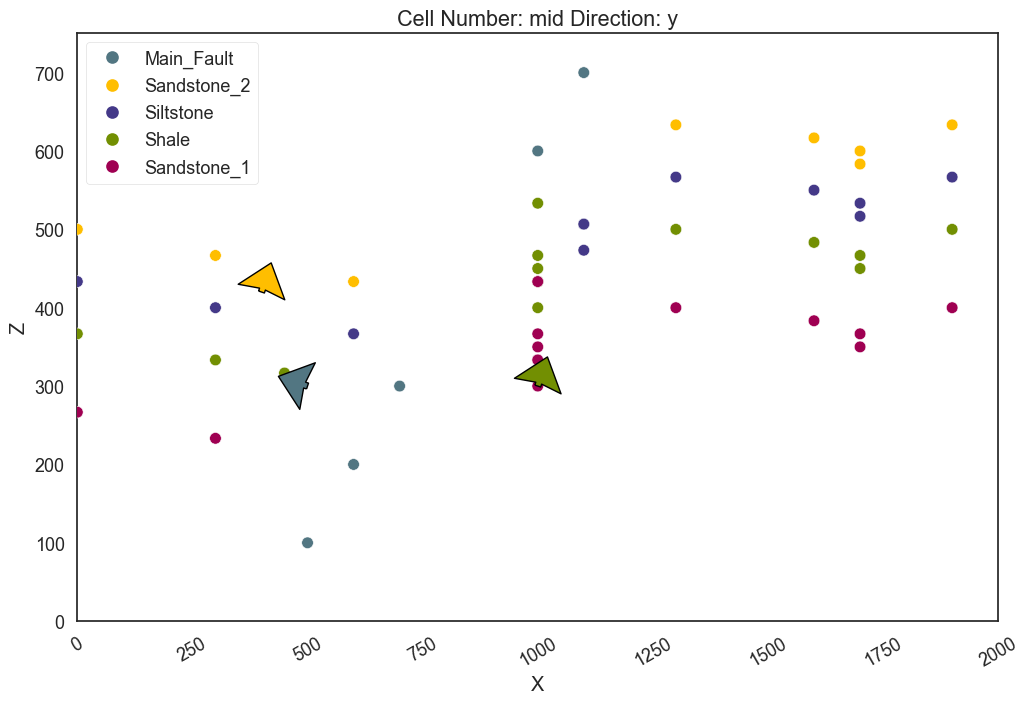

In [13]:
plot = gpv.plot_2d(geo_model, show_lith=False, show_boundaries=False)

Using  :obj:`gempy_viewer.plot_3d`, # we can also visualize this data in 3D. Note that
direct 3D visualization in GemPy requires [the Visualization
Toolkit](https://www.vtk.org/)_ (VTK) to be installed.




In [14]:
gpv.plot_3d(geo_model, image=False, plotter_type='basic')

### Model Generation
Once we've correctly defined all our primary information in our 
`gempy.core.data.GeoModel` object (referred to as `geo_model` in these tutorials),
we can proceed to the next step: preparing the input data for interpolation.


.. admonition:: New in GemPy 3!  Numpy and TensorFlow backend

   Unlike previous versions, GemPy 3 doesn't rely on `theano` or `asera`. 
   Instead, it utilizes `numpy` or `tensorflow`. Consequently, we no longer need 
   to recompile all theano functions (TensorFlow uses eager execution; we found no 
   notable speed difference after profiling the XLA compiler).



The parameters used for the interpolation are stored in 
`gempy.core.data.GeoModel.interpolation_options`. These parameters have sensible default values 
that you can modify if necessary. However, we advise caution when changing these parameters 
unless you fully understand their implications.



Display the current interpolation options



In [15]:
geo_model.interpolation_options

InterpolationOptions(kernel_options={'range': 5, 'c_o': 10, 'uni_degree': 1, 'i_res': 4, 'gi_res': 2, 'number_dimensions': 3, 'kernel_function': <AvailableKernelFunctions.cubic: KernelFunction(base_function=<function cubic_function at 0x00000254274D56C0>, derivative_div_r=<function cubic_function_p_div_r at 0x00000254274D5AB0>, second_derivative=<function cubic_function_a at 0x00000254274D5B40>, consume_sq_distance=False)>, 'compute_condition_number': False, 'kernel_solver': <Solvers.DEFAULT: 1>}, number_octree_levels=4, current_octree_level=0, compute_scalar_gradient=False, mesh_extraction=True, mesh_extraction_masking_options=MeshExtractionMaskingOptions.INTERSECT, mesh_extraction_fancy=True, debug=True, debug_water_tight=False, sigmoid_slope=50000, _number_octree_levels_surface=4)

With all our prerequisites in place, we can now compute our complete geological model 
using :func:`gempy.compute_model`. This function returns a :obj:`gempy.core.data.Solutions` object.

The following sections illustrate these different model solutions and how to utilize them.



Compute the geological model and get the solutions



In [16]:
sol = gp.compute_model(geo_model)
sol

Setting Backend To: AvailableBackends.numpy


c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy\core\data\geo_model.py:164: UserWarning: You are using refinement and passing a regular grid. The resolution of the regular grid will be overwritten
  warnings.warn(


Solutions(4 Octree Levels, 5 DualContouringMeshes)

Solutions are also stored within the :obj:`gempy.core.data.GeoModel` object, for future reference.



In [17]:
geo_model.solutions

Solutions(4 Octree Levels, 5 DualContouringMeshes)

### Direct model visualization in GemPy

Model solutions can be easily visualized in 2D sections in GemPy
directly. Let's take a look at our lithology block:




c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


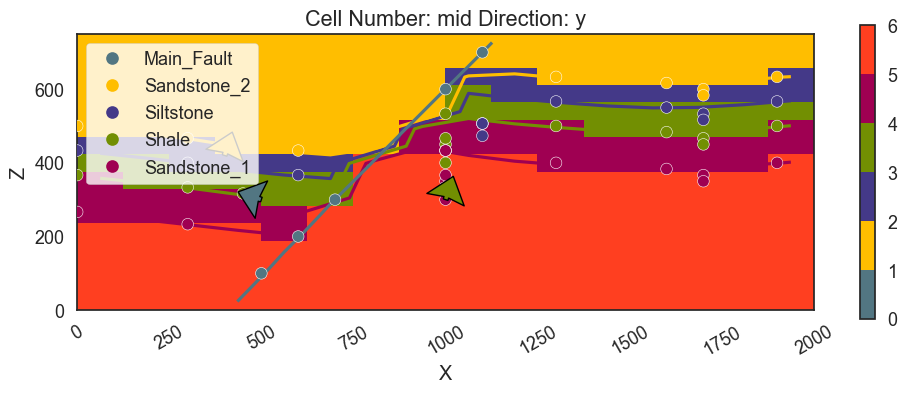

In [18]:
gpv.plot_2d(geo_model, show_data=True, cell_number="mid", direction='y')

With ``cell_number=mid``, we have chosen a section going through
the middle of our block. We have moved in ``direction='y'``,
the plot thus depicts a plane parallel to the $x$- and
$y$-axes. Setting ``show_data=True``, we could plot original data
together with the results. Changing the values for ``cell_number`` and
``direction``, we can move through our 3D block model and explore it by
looking at different 2D planes.

We can do the same with the underlying scalar-field solution:




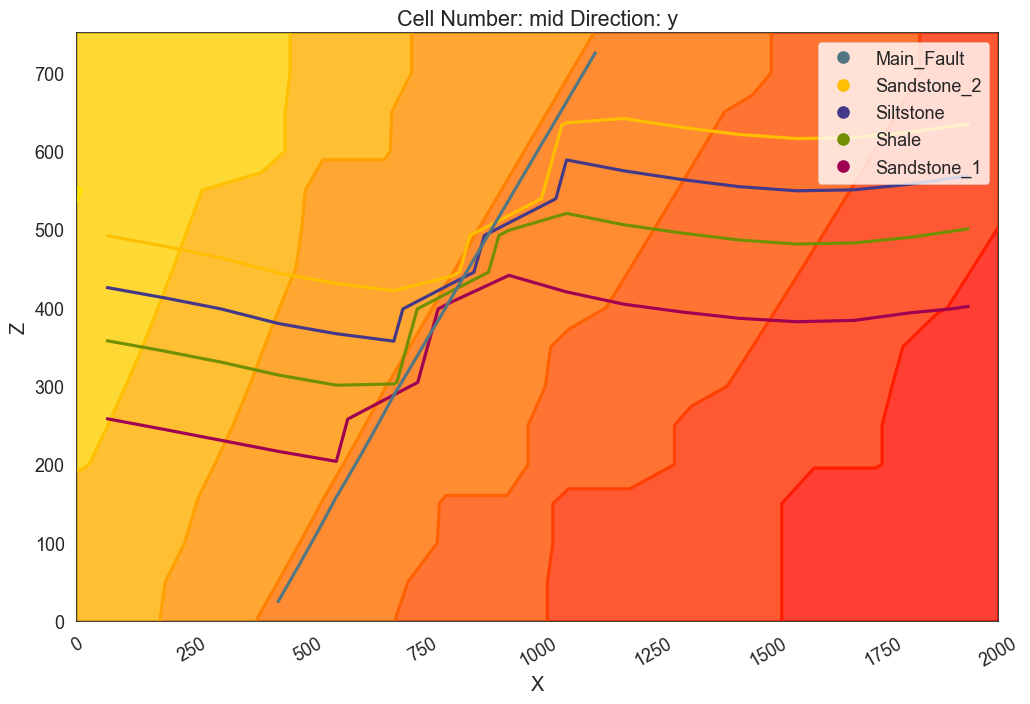

In [19]:
gpv.plot_2d(
    model=geo_model,
    series_n=0,  # This will plot the scalar field used for the fault
    show_data=False,
    show_scalar=True,
    show_lith=False
)

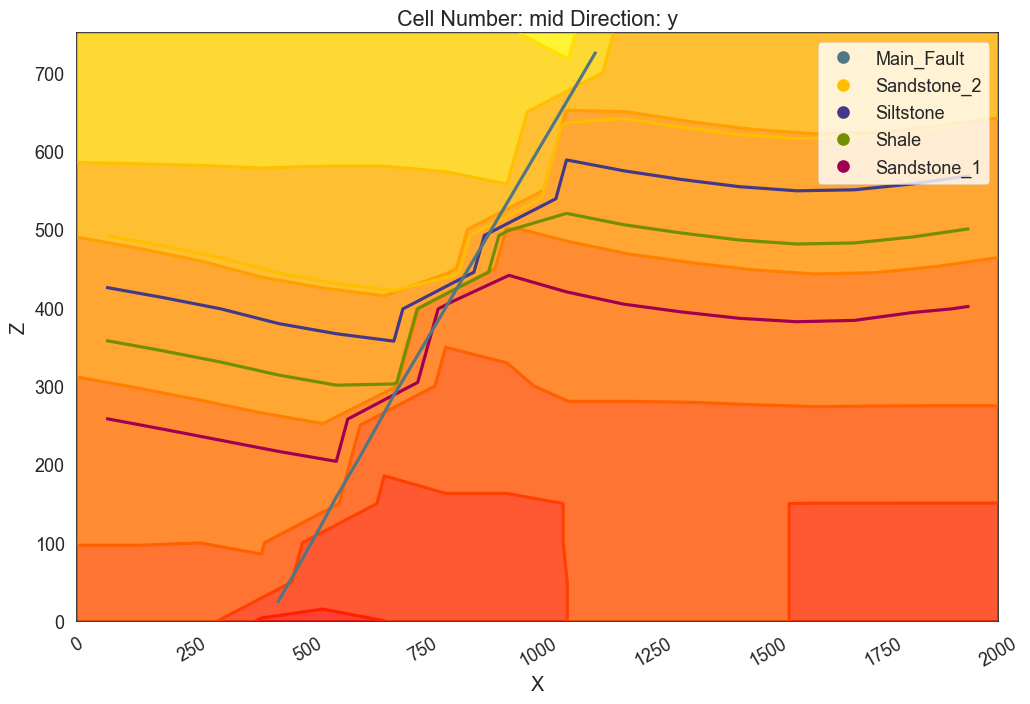

In [20]:
gpv.plot_2d(
    model=geo_model,
    series_n=1,  # This will plot the scalar field used for the stratigraphy
    show_data=False,
    show_scalar=True,
    show_lith=False
)

### Dual Contouring and vtk visualization

In addition to 2D sections we can extract surfaces to visualize in 3D
renderers. Surfaces can be visualized as 3D triangle complexes in VTK
(see function plot\_surfaces\_3D below). To create these triangles, we
need to extract respective vertices and simplices from the potential
fields of lithologies and faults. This process is automatized in GemPy
using dual contouring in the :obj:`gempy_engine`.

.. admonition:: New in GemPy 3! Dual Contouring

   GemPy 3 uses dual contouring to extract surfaces from the scalar fields. The method is completely coded in :obj:`gempy_engine` what also
   enables further improvements in the midterm. This method is more efficient to use
   together with octrees and suited better the new capabilities of gempy3. 



In [21]:
gpv.plot_3d(geo_model, show_data=False, image=False, plotter_type='basic')

### Adding topography
In gempy we can add more grid types for different purposes. We will explore this concept in more detail in the
next tutorials (:doc:`ch1_3a_grids`). For now, we will just add a topography grid to our model. This grid allows us to intersect the
surfaces as well as compute a high resolution geological mal.



Active grids: ['topography']
Setting Backend To: AvailableBackends.numpy


c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


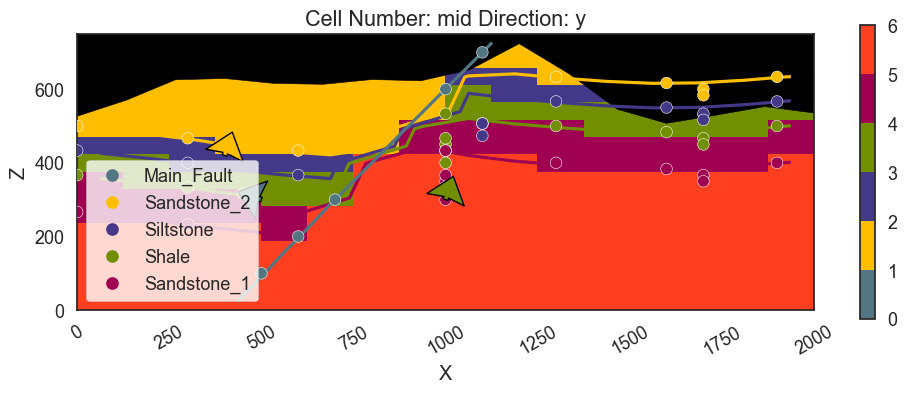

In [22]:
gp.set_topography_from_random(
    grid=geo_model.grid,
    fractal_dimension=1.2,
    d_z=np.array([350, 750]),
    topography_resolution=np.array([50, 50]),
)

gp.compute_model(geo_model)
gpv.plot_2d(geo_model, show_topography=True)

gpv.plot_3d(
    model=geo_model,
    plotter_type='basic',
    show_topography=True,
    show_surfaces=True,
    show_lith=True,
    image=False
)

### Compute at a given location

This is done by modifying the grid to a custom grid and recomputing.




In [23]:
x_i = np.array([[1000, 1000, 1000]])
lith_values_at_coords: np.ndarray = gp.compute_model_at(
    gempy_model=geo_model,
    at=x_i
)
lith_values_at_coords

Active grids: ['custom' 'topography']
Setting Backend To: AvailableBackends.numpy


array([2.])

Therefore if we just want the value at **x\_i**: 



In [24]:
geo_model.solutions.raw_arrays.custom

array([2.])

.. admonition:: Work in progress 

  GemPy3 model serialization is currently being redisigned. Therefore, at the current version, there is not a build in
  method to save the model. However, since now the data model should be completely robust, you should be able to save the
  :obj:`gempy.core.data.GeoModel` and all its attributes using the standard python library [pickle](https://docs.python.org/3/library/pickle.html)

sphinx_gallery_thumbnail_number = -2

